In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Dropping some column which is not required because we want to categorize based on spending
X = df.drop(['CustomerID','Gender','Age'],axis=1)
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


# Selecting best value of n_clusters

In [6]:
wcss = []
for i in range(1,20):
    model = KMeans(n_clusters=i,init='k-means++',random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

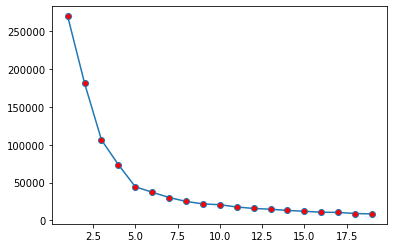

In [7]:
plt.plot(range(1,20),wcss,marker='o',mfc='r')

We can see that after 5 there is an abdrupt change

In [8]:
model = KMeans(n_clusters=5,init='k-means++',random_state=42)
pred = model.fit_predict(X)
# centroids = KMeans.cluster_centers_

In [9]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X,pred)

In [10]:
score

0.553931997444648

# Plotting the clusters

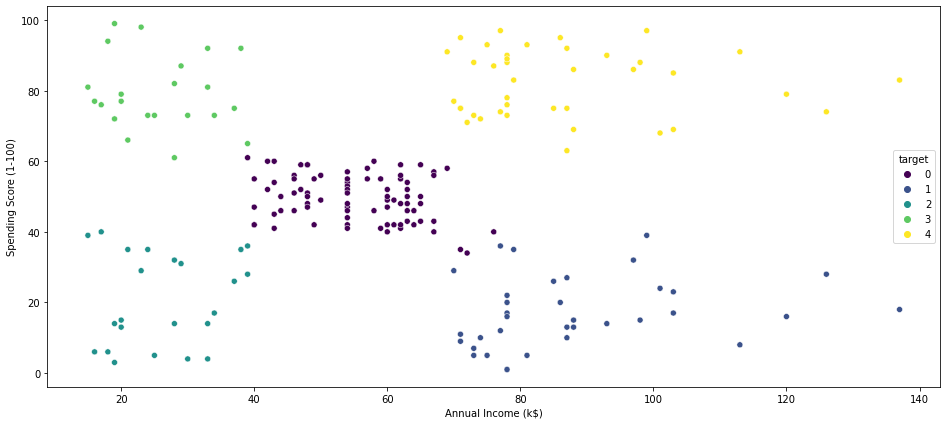

In [11]:
df['target']= pred
plt.figure(figsize=(16,7))
sns.scatterplot(x=X['Annual Income (k$)'],y=X['Spending Score (1-100)'],hue='target',palette='viridis',data=df,legend="full")
plt.show()